# Outliers, Duplicates and Missing Values NA

## Outliers
When exploring data, the outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values—either being much larger or significantly smaller. For data that follows a normal distribution, the values that fall more than three standard deviations from the mean are typically considered outliers. 
Outliers can find their way into a dataset naturally through variability, or they can be the result of issues like human error, faulty equipment, or poor sampling. Regardless of how they get into the data, outliers can have a big impact on statistical analysis and machine learning because they impact calculations like mean and standard deviation, and they can skew hypothesis tests. A data analyst should use various techniques to visualize and identify outliers before deciding whether they should be dropped, kept, or modified

## data set
<br> The examples throughout this article use the Uber Fares Dataset available on Kaggle.com. Download the CSV to follow along. It has nine columns and 200k rows. These are the fields we will use:
    - https://www.kaggle.com/datasets/yasserh/uber-fares-dataset?select=uber.csv

-  key — a unique identifier for each trip
-  fare_amount — the cost of each trip in usd
-  pickup_datetime — date and time when the meter was engaged
-  passenger_count — the number of passengers in the vehicle (driver entered value)


In [2]:
path ='../data/misc/uber.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px  #interactive plots
from pydataset import data

In [3]:
# mtcars
mt = data('mtcars')
mt.shape

(32, 11)

In [4]:
mt[['mpg','wt']].describe()

,mpg,wt
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


In [5]:
mt['mpg'].quantile([.25, .75])

0.25    15.425
0.75    22.800
Name: mpg, dtype: float64

In [6]:
mtmpg = np.array(mt['mpg'].to_list()).reshape(-1,32)
mtmpg
#converto array

array([[21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
        16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
        15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4]])

In [7]:
q1mpg = np.quantile(mtmpg,q=.25)
q3mpg = np.quantile(mtmpg,q=.75)
IQRmpg = q3mpg - q1mpg
print(q1mpg, q3mpg, IQRmpg, (q1mpg - 1.5*IQRmpg).round(2), (q3mpg + 1.5 * IQRmpg).round(2))

15.425 22.8 7.375 4.36 33.86


In [8]:
mtmpg[mtmpg < (q1mpg - 1.5*IQRmpg)]

array([], dtype=float64)

In [9]:
mtmpg[mtmpg > (q3mpg + 1.5*IQRmpg)]

array([33.9])

In [10]:
mtmpg[(mtmpg < (q1mpg - 1.5*IQRmpg)) | (mtmpg > (q3mpg + 1.5*IQRmpg))]

array([33.9])

In [11]:
#ACTIONS - remove, cap, impute
mtmpg[~(mtmpg < (q1mpg - 1.5*IQRmpg)) | (mtmpg > (q3mpg + 1.5*IQRmpg))]  #remove

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [12]:
#cap values : < 12 to 12, >30 to 30
mtmpgCap = np.where(mtmpg > 30, 30, np.where(mtmpg < 12, 12, mtmpg))
print(mtmpgCap, '\t size : ', np.size(mtmpgCap))

[[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
  12.  12.  14.7 30.  30.  30.  21.5 15.5 15.2 13.3 19.2 27.3 26.  30.
  15.8 19.7 15.  21.4]] 	 size :  32


In [13]:
#replace/Impute outliers with mean values
print('Mean Value : ', np.mean(mtmpg).round(2))
mpgMean = np.mean(mtmpg).round(2)
mtmpgImpute = np.where(mtmpg > (q3mpg + 1.5*IQRmpg), mpgMean,  np.where(mtmpg < (q1mpg - 1.5*IQRmpg), mpgMean, mtmpg))
print(mtmpgImpute, '\t size : ', np.size(mtmpgCap), ' \n Original values :', mtmpg)

Mean Value :  20.09
[[21.   21.   22.8  21.4  18.7  18.1  14.3  24.4  22.8  19.2  17.8  16.4
  17.3  15.2  10.4  10.4  14.7  32.4  30.4  20.09 21.5  15.5  15.2  13.3
  19.2  27.3  26.   30.4  15.8  19.7  15.   21.4 ]] 	 size :  32  
 Original values : [[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
  10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
  15.8 19.7 15.  21.4]]


In [14]:
#now practise with other variable - weight

In [15]:
#then practise with dataset - uber  
#remove outliers from passenger count and fare_amount

In [16]:
os.listdir('../data/misc')

['.ipynb_checkpoints',
 'AirPassengers.csv',
 'ardata.csv',
 'sampleWords.txt',
 'uber.csv']

In [17]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [18]:
#drop the unnecessary columns
df1 = df.drop(columns=(['Unnamed: 0', 'key','pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']))
df1.head()

,fare_amount,passenger_count
0,7.5,1
1,7.7,1
2,12.9,1
3,5.3,3
4,16.0,5


In [19]:
df.describe()[['fare_amount', 'passenger_count']]
#compare Mean, Min, Max.  
# fare -mean of 11, max of 499
# passengers - mean of 1.68, max of 208

,fare_amount,passenger_count
count,200000.000000,200000.000000
mean,11.359955,1.684535
std,9.901776,1.385997
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


In [20]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [21]:
from scipy.stats import iqr
k=1.5  # (Q1 - k * IQR), (Q3 + k * IQR)
#we can set k and use median value for finding outliers

# what to do with outlers
-  Drop the outliers
-  Cap the outliers
-  Replace outliers using imputation as if they were missing values

In [22]:
# drop outliers from passenger count

In [23]:
outliers = find_outliers_IQR(df['fare_amount'])
print('number of outliers:'+ str(len(outliers)))
print('max outlier value:'+ str(outliers.max()))
print('min outlier value:'+ str(outliers.min()))

number of outliers:17167
max outlier value:499.0
min outlier value:-52.0


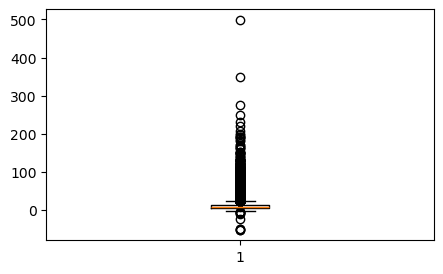

In [24]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(df.fare_amount)
plt.show();

In [25]:
min = np.min(df.fare_amount)
max = np.max(df.fare_amount)
q1 = np.quantile(df.fare_amount, q=.25)
q3 = np.quantile(df.fare_amount, q=.75)
iqr = q3 - q1
lowerBound = q1 - (1.5 * iqr)
upperBound = q3 + (1.5 * iqr)
print(min, max, q1,q3, iqr, '\t Bounds : Lower/Upper ', lowerBound, upperBound)

-52.0 499.0 6.0 12.5 6.5 	 Bounds : Lower/Upper  -3.75 22.25


In [26]:
outliersFare = df.fare_amount[(df.fare_amount<= lowerBound) | (df.fare_amount >= upperBound)]
nonOutliersFare = df.fare_amount[~ ((df.fare_amount<= lowerBound) | (df.fare_amount >= upperBound))]
print(outliersFare, '\n : Count of Outliers : ', np.size(outliersFare), '\n : Count of non outliers ', np.size(nonOutliersFare))

6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17167, dtype: float64 
 : Count of Outliers :  17167 
 : Count of non outliers  182833


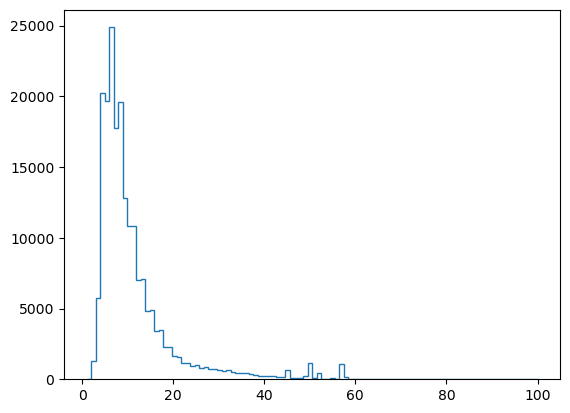

In [27]:
counts, bins = np.histogram(df.fare_amount, bins=100, range=(1,100))
plt.stairs(counts, bins)

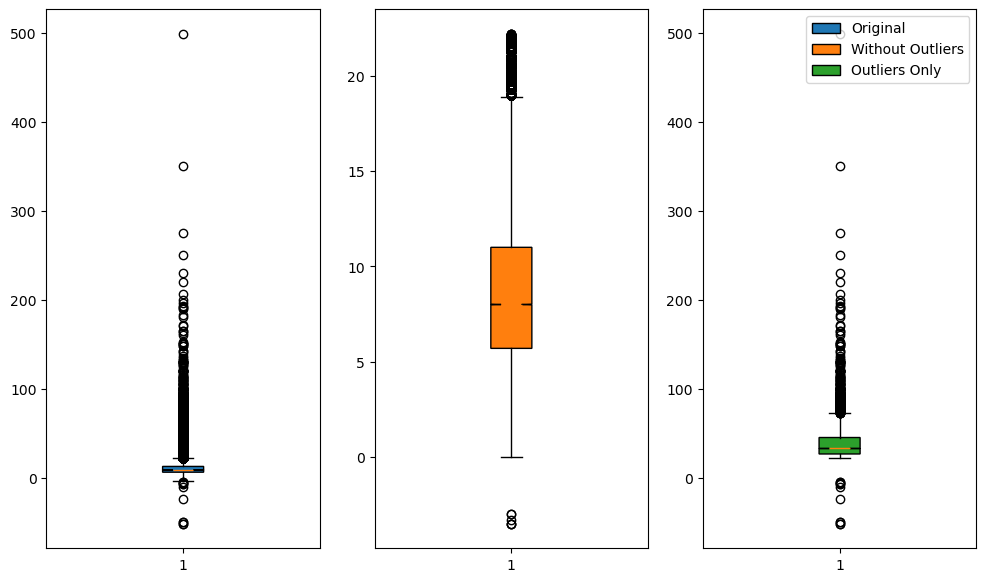

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 7))
bp1 = ax1.boxplot(df.fare_amount, notch=True, patch_artist=True, boxprops=dict(facecolor="C0"))
bp2 = ax2.boxplot(nonOutliersFare, notch=True, patch_artist=True, boxprops=dict(facecolor="C1"))
bp3 = ax3.boxplot(outliersFare, notch=True, patch_artist=True, boxprops=dict(facecolor="C2"))
plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ["Original", "Without Outliers",'Outliers Only'], loc='upper right')
plt.show();

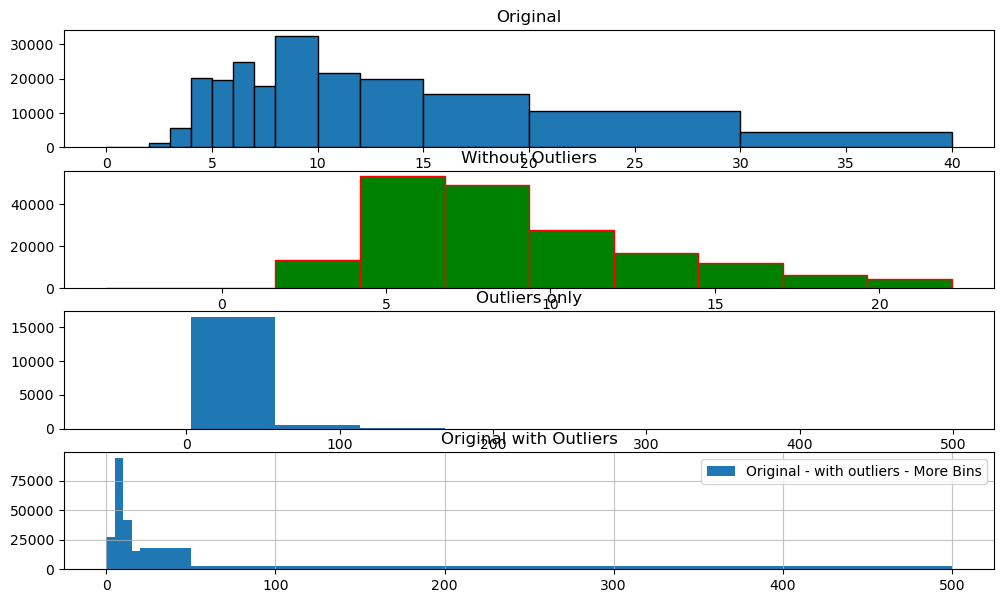

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(12, 7))
nBins = 10
plt.grid(axis='both', alpha=0.75)
ax1.hist(df.fare_amount, histtype='bar',edgecolor='black', bins=[0,1,2,3,4,5,6,7,8,10,12,15,20,30,40], label='Original - with outliers')
ax1.set_title('Original')
ax2.hist(nonOutliersFare, nBins, label='Without Oultiers - Desired', edgecolor='red', histtype='bar', color='g')
ax2.set_title('Without Outliers')
ax3.hist(outliersFare, nBins, label='Outliers Only')
ax3.set_title('Outliers only')
#ax4.hist(df.fare_amount, nBins+100, label='Original - with outliers - More Bins')
ax4.hist(df.fare_amount, bins=[0,5,10,15,20,50, 500], label='Original - with outliers - More Bins')
ax4.set_title('Original with Outliers')
plt.legend(loc='upper right')
plt.show();

In [30]:
# drop outliers from fare_amount

# Links
https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/


# Missing Values
isnull()
notnull()
dropna()
fillna()
replace()
interpolate()

In [31]:
dict = {'Maths':[100, 90, np.nan, 95],
        'Science': [30, 45, 56, np.nan],
        'English':[np.nan, 40, 80, 98]}
df = pd.DataFrame(dict)
df 

,Maths,Science,English
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [32]:
# using isnull() function  
df.isnull()

,Maths,Science,English
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [33]:
df.notnull() #opposite of isnull()

,Maths,Science,English
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [34]:
df.fillna(0)  #fill missing values with 0

,Maths,Science,English
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [35]:
df.fillna(method ='pad')  #fill missing values with previous one

C:\Users\dupad_el7s75\AppData\Local\Temp\ipykernel_7616\415896221.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='pad')  #fill missing values with previous one


,Maths,Science,English
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


In [37]:
df.fillna(method ='bfill') #fill missing values with next one

C:\Users\dupad_el7s75\AppData\Local\Temp\ipykernel_7616\4164841351.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='bfill') #fill missing values with next one


,Maths,Science,English
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


In [38]:
# will replace  Nan value in dataframe with value -99  
df.replace(to_replace = np.nan, value = -99, inplace=False) 

,Maths,Science,English
0,100.0,30.0,-99.0
1,90.0,45.0,40.0
2,-99.0,56.0,80.0
3,95.0,-99.0,98.0


In [39]:
# to interpolate the missing values  - avg of (previous + next )
df.interpolate(method ='linear', limit_direction ='forward')

,Maths,Science,English
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,56.0,80.0
3,95.0,56.0,98.0


In [40]:
df.dropna()  #drop missing values : drop all rows having even 1 missing value in column

,Maths,Science,English
1,90.0,45.0,40.0


In [41]:
df

,Maths,Science,English
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [42]:
df['Hindi'] = pd.Series([np.nan, np.nan, np.nan, np.nan])
df['History'] = pd.Series([50, 70,80, 77, 90])
df

,Maths,Science,English,Hindi,History
0,100.0,30.0,NaN,NaN,50
1,90.0,45.0,40.0,NaN,70
2,NaN,56.0,80.0,NaN,80
3,95.0,NaN,98.0,NaN,77


In [43]:
df.dropna(axis=0)  #drop all rows if any column value in a row is missing

,Maths,Science,English,Hindi,History


In [44]:
df.dropna(axis=1)  #drop all columns which have any row value missing

,History
0,50
1,70
2,80
3,77


In [45]:
df.dropna(how = 'all', axis=0)  #if all col values of row are missing, None

,Maths,Science,English,Hindi,History
0,100.0,30.0,NaN,NaN,50
1,90.0,45.0,40.0,NaN,70
2,NaN,56.0,80.0,NaN,80
3,95.0,NaN,98.0,NaN,77


In [46]:
df.dropna(how = 'all', axis=1)  #if all col values are missing, Hindi gone

,Maths,Science,English,History
0,100.0,30.0,NaN,50
1,90.0,45.0,40.0,70
2,NaN,56.0,80.0,80
3,95.0,NaN,98.0,77


In [50]:
#!pip install missingno

In [51]:
import missingno as msno

<Axes: >

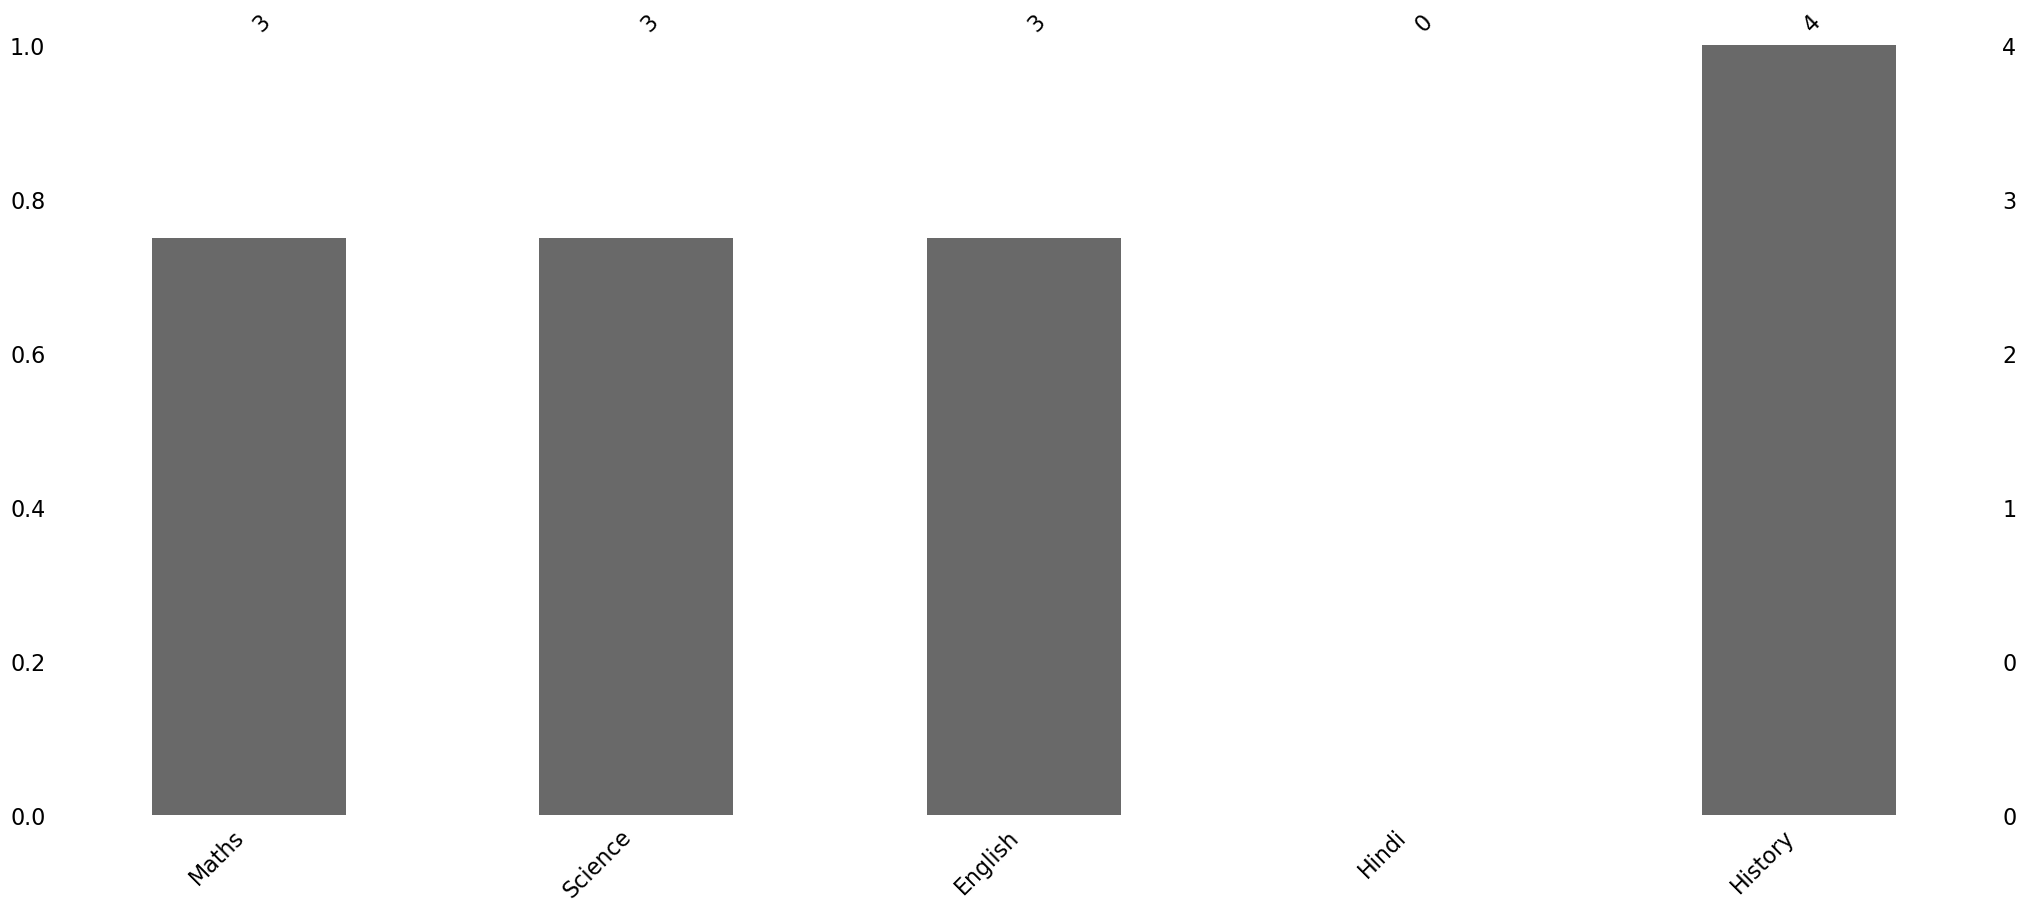

In [52]:
msno.bar(df)

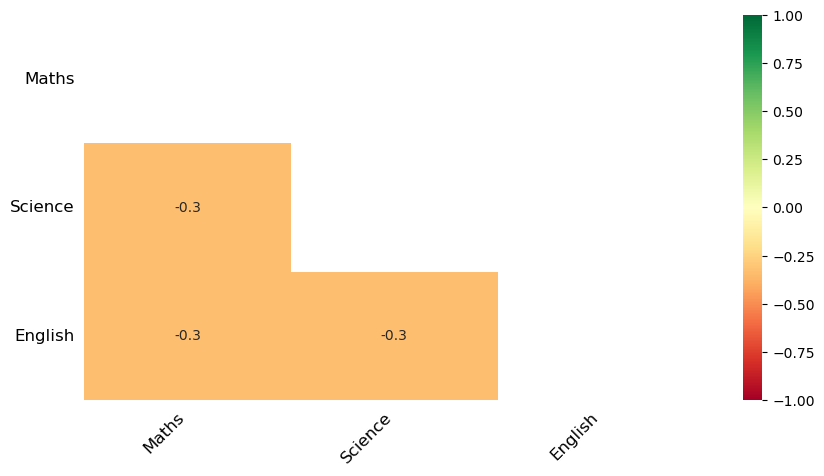

In [53]:
msno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);
# correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another
#if dob is missing, age is also missing

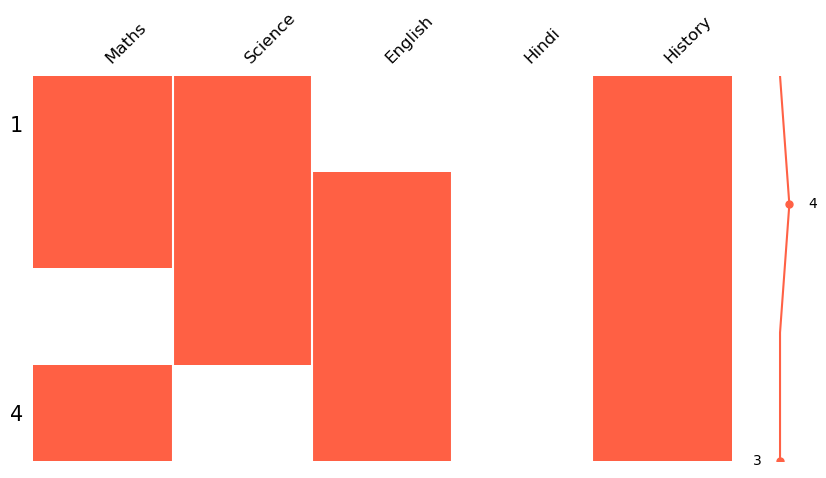

In [54]:
msno.matrix(df, figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27));
#help(msno.matrix)

<Axes: >

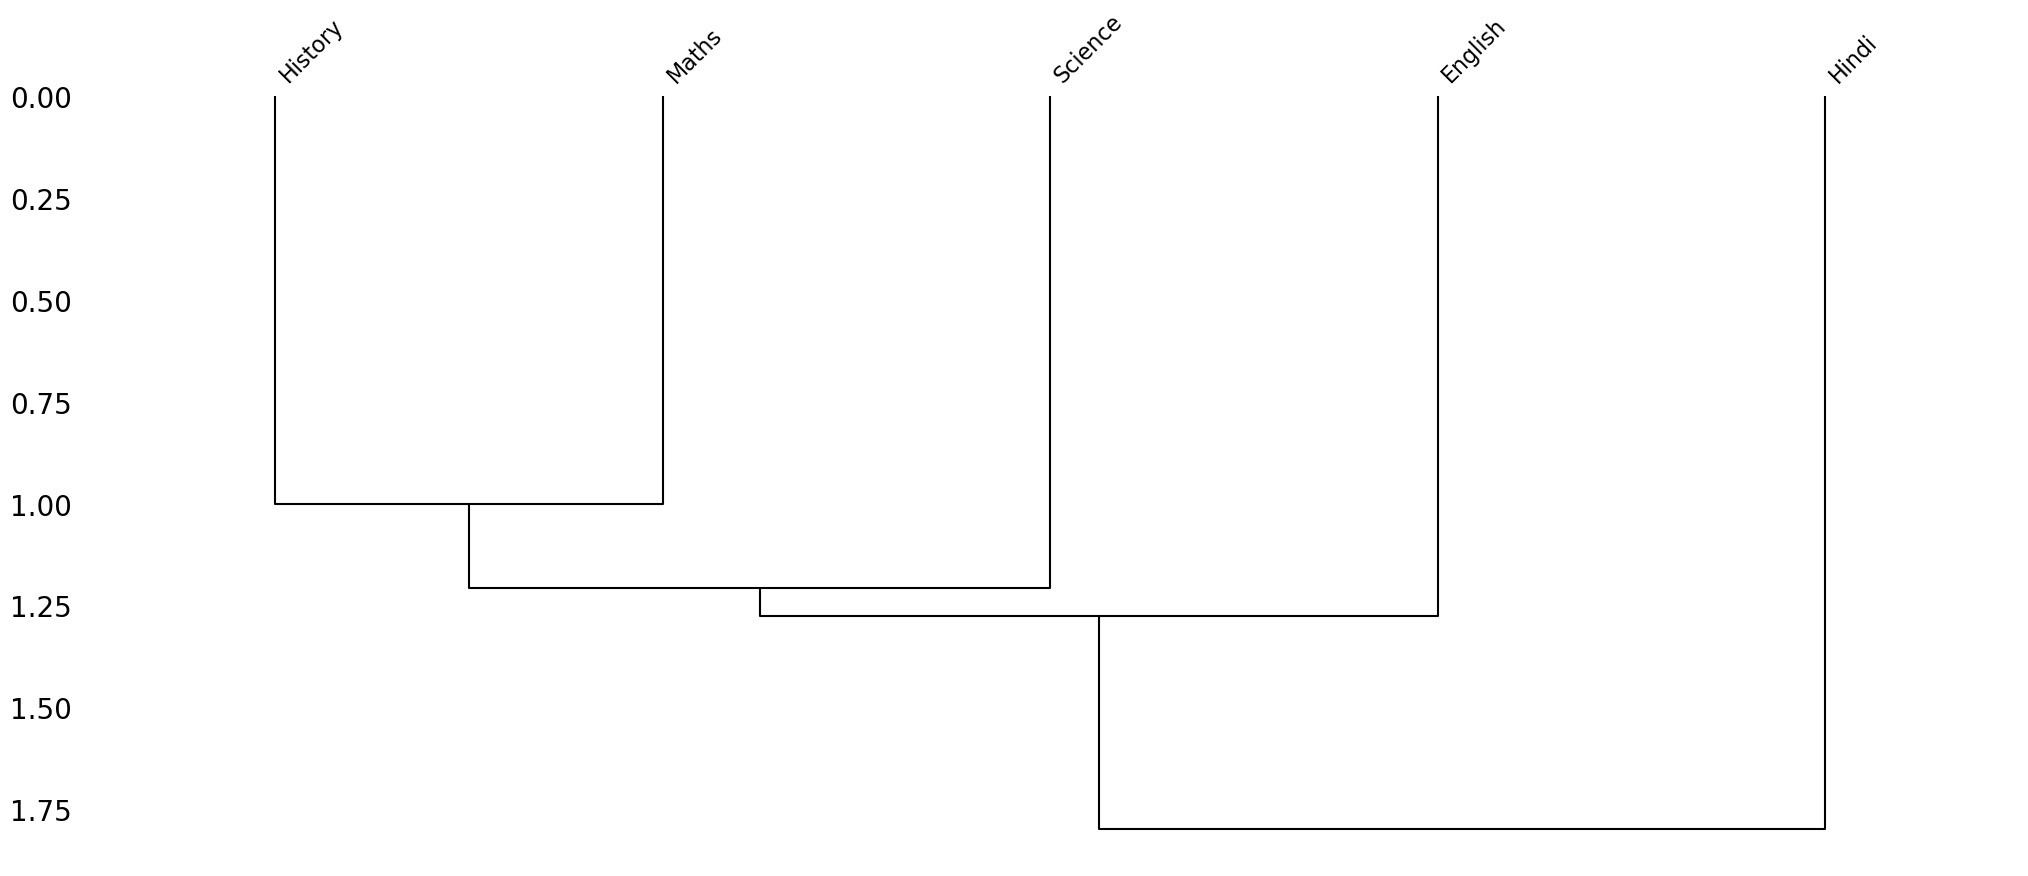

In [56]:
msno.dendrogram(df)

In [237]:
#now practise with these datasets
#https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
#https://www.kaggle.com/starbucks/store-locations
#https://www.kaggle.com/justinas/housing-in-london

#links
https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python


In [57]:
# Duplicates
name = ['Dhiraj', 'Romila', 'Karan', 'Kunal', 'Sumit', 'Romila']
gender = ['M','F','M','M','M','M']
age = np.random.randint(30,40, size=6)
city = np.random.choice(a= ['Delhi','Mumbai','Chennai'], size=6, replace=True)
df1 = pd.DataFrame({'name':name, 'gender':gender, 'age':age, 'city':city})
df1

,name,gender,age,city
0,Dhiraj,M,39,Mumbai
1,Romila,F,33,Delhi
2,Karan,M,31,Mumbai
3,Kunal,M,39,Delhi
4,Sumit,M,38,Chennai
5,Romila,M,32,Mumbai


In [58]:
#df1B = pd.DataFrame({'name':['Dhiraj'], 'gender':['M'],'age':[31], 'city': ['Delhi']})
df1B = df1.iloc[[0,0]]  #create a duplicate row
#pd.concat([df1, df2], axis=1)
df1B

,name,gender,age,city
0,Dhiraj,M,39,Mumbai
0,Dhiraj,M,39,Mumbai


In [59]:
df2= pd.concat([df1, df1B]).reset_index().drop(columns='index')
df2

,name,gender,age,city
0,Dhiraj,M,39,Mumbai
1,Romila,F,33,Delhi
2,Karan,M,31,Mumbai
3,Kunal,M,39,Delhi
4,Sumit,M,38,Chennai
5,Romila,M,32,Mumbai
6,Dhiraj,M,39,Mumbai
7,Dhiraj,M,39,Mumbai


In [60]:
#using set
print(df2['name'].tolist())
print(set(df2['name'].tolist()))  #Dhiraj , Romila

['Dhiraj', 'Romila', 'Karan', 'Kunal', 'Sumit', 'Romila', 'Dhiraj', 'Dhiraj']
{'Dhiraj', 'Sumit', 'Karan', 'Romila', 'Kunal'}


In [61]:
#using list comprehension
ageList = df2['age'].tolist()
newList = []
dupList = []
for i in ageList:
    if i not in newList:
        newList.append(i)
    else:
        dupList.append(i)
print('Duplicate Ages', dupList)
print('Unique Ages', newList)
print('Original List ', ageList)
print(pd.Series(ageList).value_counts() > 1)

Duplicate Ages [39, 39, 39]
Unique Ages [39, 33, 31, 38, 32]
Original List  [39, 33, 31, 39, 38, 32, 39, 39]
39     True
33    False
31    False
38    False
32    False
Name: count, dtype: bool


In [62]:
dup = {x for x in ageList if ageList.count(x) > 1}
dup

{39}

In [63]:
set(ageList)

{31, 32, 33, 38, 39}

In [64]:
#pandas
df2

,name,gender,age,city
0,Dhiraj,M,39,Mumbai
1,Romila,F,33,Delhi
2,Karan,M,31,Mumbai
3,Kunal,M,39,Delhi
4,Sumit,M,38,Chennai
5,Romila,M,32,Mumbai
6,Dhiraj,M,39,Mumbai
7,Dhiraj,M,39,Mumbai


In [65]:
df2.duplicated(keep='first')
#last row is duplicate and is show .. but with which row

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
dtype: bool

In [66]:
df2.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [67]:
df2.duplicated(keep=False)   #all duplicates are true

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7     True
dtype: bool

In [68]:
df2[df2.duplicated(subset = ['city'])]

,name,gender,age,city
2,Karan,M,31,Mumbai
3,Kunal,M,39,Delhi
5,Romila,M,32,Mumbai
6,Dhiraj,M,39,Mumbai
7,Dhiraj,M,39,Mumbai


In [69]:
df2[df2.duplicated(subset = ['name', 'city'], keep='first')]

,name,gender,age,city
6,Dhiraj,M,39,Mumbai
7,Dhiraj,M,39,Mumbai


In [70]:
df2.drop_duplicates(keep='first')

,name,gender,age,city
0,Dhiraj,M,39,Mumbai
1,Romila,F,33,Delhi
2,Karan,M,31,Mumbai
3,Kunal,M,39,Delhi
4,Sumit,M,38,Chennai
5,Romila,M,32,Mumbai


In [71]:
df2.drop_duplicates(subset = ['name', 'gender'], keep='first')

,name,gender,age,city
0,Dhiraj,M,39,Mumbai
1,Romila,F,33,Delhi
2,Karan,M,31,Mumbai
3,Kunal,M,39,Delhi
4,Sumit,M,38,Chennai
5,Romila,M,32,Mumbai


In [72]:
df2.value_counts()  #count of each row combination
#Dhiraj,M,33,Chennai - 3

name    gender  age  city   
Dhiraj  M       39   Mumbai     3
Karan   M       31   Mumbai     1
Kunal   M       39   Delhi      1
Romila  F       33   Delhi      1
        M       32   Mumbai     1
Sumit   M       38   Chennai    1
Name: count, dtype: int64

In [73]:
#find duplicates in iris data set
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [74]:
iris.duplicated().sum()

1

In [75]:
iris.value_counts()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species   
5.8           2.7          5.1           1.9          virginica     2
6.2           2.2          4.5           1.5          versicolor    1
              2.9          4.3           1.3          versicolor    1
              3.4          5.4           2.3          virginica     1
6.3           2.3          4.4           1.3          versicolor    1
              2.5          4.9           1.5          versicolor    1
                           5.0           1.9          virginica     1
              2.7          4.9           1.8          virginica     1
              2.8          5.1           1.5          virginica     1
              2.9          5.6           1.8          virginica     1
              3.3          4.7           1.6          versicolor    1
                           6.0           2.5          virginica     1
              3.4          5.6           2.4          virginica     1
6.4           2.7        

In [76]:
iris[['Sepal.Length','Sepal.Width']].value_counts()

Sepal.Length  Sepal.Width
5.8           2.7            4
5.1           3.8            3
6.5           3.0            3
6.9           3.1            3
6.7           3.1            3
              3.0            2
6.3           2.5            2
5.0           3.4            2
              3.5            2
6.7           3.3            2
6.0           2.2            2
5.1           3.5            2
6.3           3.3            2
6.4           3.2            2
5.4           3.4            2
5.5           2.4            2
6.4           2.8            2
5.6           3.0            2
4.7           3.2            2
4.8           3.4            2
5.9           3.0            2
6.1           2.8            2
4.8           3.0            2
6.1           3.0            2
5.4           3.9            2
5.7           2.8            2
4.9           3.1            2
6.2           2.2            1
              2.8            1
6.3           2.7            1
6.2           2.9            1
6.3          

In [77]:
sum(iris[['Sepal.Length','Sepal.Width']].value_counts() > 1)
#27 duplicates

27

In [78]:
iris.duplicated(subset=['Sepal.Length','Sepal.Width']).sum()

33

In [79]:
iris[iris.duplicated(subset=['Sepal.Length','Sepal.Width'])].sort_values(by=['Sepal.Length','Sepal.Width'])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
30,4.7,3.2,1.6,0.2,setosa
46,4.8,3.0,1.4,0.3,setosa
25,4.8,3.4,1.9,0.2,setosa
35,4.9,3.1,1.5,0.2,setosa
27,5.0,3.4,1.6,0.4,setosa
44,5.0,3.5,1.6,0.6,setosa
18,5.1,3.5,1.4,0.3,setosa
45,5.1,3.8,1.9,0.4,setosa
47,5.1,3.8,1.6,0.2,setosa
32,5.4,3.4,1.5,0.4,setosa


In [80]:
iris[~iris.duplicated(subset=['Sepal.Length','Sepal.Width'])].sort_values(by=['Sepal.Length','Sepal.Width'])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
14,4.3,3.0,1.1,0.1,setosa
9,4.4,2.9,1.4,0.2,setosa
39,4.4,3.0,1.3,0.2,setosa
43,4.4,3.2,1.3,0.2,setosa
42,4.5,2.3,1.3,0.3,setosa
4,4.6,3.1,1.5,0.2,setosa
48,4.6,3.2,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
23,4.6,3.6,1.0,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


# end here